In [1]:
import pandas as pd 


df = pd.read_csv("/workspaces/Despliegue_Proyecto_Final/src/santander_limpio_filtrado_y_data_engeniering.csv")
df.shape

(319400, 22)

In [2]:
df.head(10)

,sexo,age,antiguedad,canal_entrada,renta,segmento,cuenta_ahorros,cuenta_corriente,credito_rapido,cuenta_nomina,...,cuenta_apertura,cuenta_pagos,cuenta_debitos,deposito_largo_plazo,ecuenta,hipotecas,ahorro_programado,prestamo_libre_inversion,tarjeta_credito,credito_vivienda
0,H,27,6,KHM,129278.58,02 - PARTICULARES,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,H,40,6,KHM,108126.36,02 - PARTICULARES,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,V,38,6,KHM,77138.43,02 - PARTICULARES,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,H,54,6,KHM,151205.88,01 - TOP,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,V,28,6,KHM,402163.80,03 - UNIVERSITARIO,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,H,33,6,KHM,127794.42,03 - UNIVERSITARIO,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,V,24,6,KHM,94089.81,02 - PARTICULARES,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,V,65,6,KHN,172659.33,01 - TOP,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,V,36,6,KHM,108126.36,02 - PARTICULARES,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,V,34,6,KHM,161536.23,02 - PARTICULARES,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [3]:
df['total_productos'] = df[['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']].sum(axis=1)

In [3]:
df['antiguedad_por_edad'] = df['antiguedad'] / (df['age'] * 12)  # Convertir edad a meses

In [3]:
var_categoricas_2 = []
var_numericas_2 = []
var_fechas_2 = []

for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        var_fechas_2.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        var_numericas_2.append(col)
    elif df[col].dtype == 'object':
        var_categoricas_2.append(col)

print("Variables de tipo fecha:")
print(var_fechas_2)

print("Variables categóricas:")
print(var_categoricas_2)

print("Variables numéricas:")
print(var_numericas_2)

Variables de tipo fecha:
[]
Variables categóricas:
['sexo', 'canal_entrada', 'segmento']
Variables numéricas:
['age', 'antiguedad', 'renta', 'cuenta_ahorros', 'cuenta_corriente', 'credito_rapido', 'cuenta_nomina', 'cuenta_joven', 'cuenta_adulto_mayor', 'cuenta_apertura', 'cuenta_pagos', 'cuenta_debitos', 'deposito_largo_plazo', 'ecuenta', 'hipotecas', 'ahorro_programado', 'prestamo_libre_inversion', 'tarjeta_credito', 'credito_vivienda']


In [4]:
def porcentaje_outliers(df):
    porcentajes = {}
    for col in df.select_dtypes(include='number').columns:
        # Excluir columnas con solo 2 valores únicos (binarias)
        if df[col].nunique() <= 2:
            continue

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        porcentaje = len(outliers) / len(df) * 100
        porcentajes[col] = round(porcentaje, 2)

    return porcentajes

# Resultado
# print(porcentaje_outliers(df))

# Convertir diccionario a DataFrame
df_outliers = pd.DataFrame.from_dict(porcentaje_outliers(df), orient='index', columns=['% Outliers'])

# Resetear índice para tener columna con nombres
df_outliers = df_outliers.reset_index().rename(columns={'index': 'Variable'})

# Ordenar de mayor a menor
df_outliers = df_outliers.sort_values(by='% Outliers', ascending=False)

# Mostrar
print(df_outliers.head(20))  # muestra las 10 con más outliers

     Variable  % Outliers
2       renta        6.76
0         age        2.27
1  antiguedad        0.00


In [5]:
# Contar cuántos tienen edad menor a 18
menores_18 = df[df['age'] < 18].shape[0]    #print("Registros con edad < 18:", (df['age'] < 18).sum())

# Contar cuántos tienen edad mayor a 100
mayores_100 = df[df['age'] > 90].shape[0]

print("Registros con edad < 18:", menores_18)
print("Registros con edad > 90:", mayores_100)

Registros con edad < 18: 6
Registros con edad > 90: 0


In [6]:
# Seleccionar columnas numéricas
cols_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Filtrar columnas no binarias
no_binarias = [col for col in cols_numericas if df[col].nunique() > 2]
conteo_ceros = df[no_binarias].apply(lambda col: (col == 0).sum())
print(conteo_ceros)


age            0
antiguedad    29
renta          0
dtype: int64


### Proporción de columnas binarias con valores en cero y uno

In [7]:
# Seleccionar variables binarias tipo numérico con valores 0 y 1
variables_binarias = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if set(df[col].dropna().unique()) <= {0, 1}
]

# Crear resumen
resumen = []

for var in variables_binarias:
    total_1 = df[var].sum()
    total_0 = df[var].value_counts().to_dict().get(0, 0)
    total = df[var].count()

    # Verificamos que total sea mayor que 0 para evitar división por cero
    if total > 0:
        porcentaje_1 = round((total_1 / total) * 100, 2)
    else:
        porcentaje_1 = None

    resumen.append({
        'variable': var,
        'total_1': int(total_1),
        'total_0': int(total_0),
        'total_registros': int(total),
        'porcentaje_1': porcentaje_1
    })

# Crear y ordenar DataFrame
df_resumen = pd.DataFrame(resumen)
df_resumen.sort_values(by='porcentaje_1', ascending=False, inplace=True)

# Mostrar
print(df_resumen)



                    variable  total_1  total_0  total_registros  porcentaje_1
10                   ecuenta   205394   114006           319400         64.31
1           cuenta_corriente   184492   134908           319400         57.76
3              cuenta_nomina   109987   209413           319400         34.44
14           tarjeta_credito   103713   215687           319400         32.47
9       deposito_largo_plazo    95936   223464           319400         30.04
6            cuenta_apertura    55687   263713           319400         17.43
7               cuenta_pagos    35697   283703           319400         11.18
12         ahorro_programado    11543   307857           319400          3.61
11                 hipotecas     7320   312080           319400          2.29
5        cuenta_adulto_mayor     3460   315940           319400          1.08
15          credito_vivienda     2286   317114           319400          0.72
13  prestamo_libre_inversion      650   318750           319400 

In [8]:
top_n = 5
top_categorias = df['canal_entrada'].value_counts().nlargest(top_n).index
df['canal_entrada'] = df['canal_entrada'].apply(lambda x: x if x in top_categorias else 'Otros')

sexo
V    0.615582
H    0.384418
Name: proportion, dtype: float64


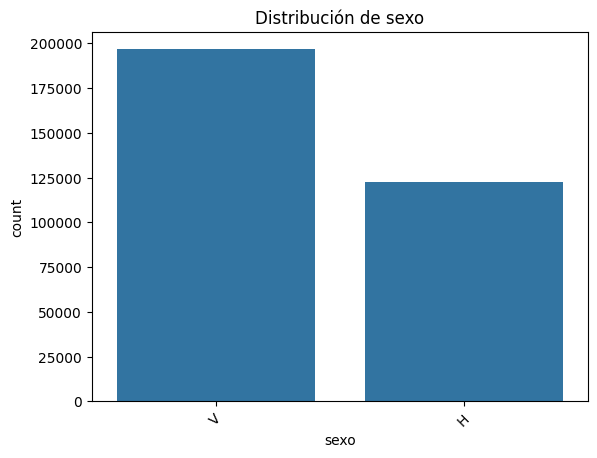

canal_entrada
KAT      0.419014
KFC      0.317818
Otros    0.154070
KFA      0.061393
KHM      0.025169
KHN      0.022536
Name: proportion, dtype: float64


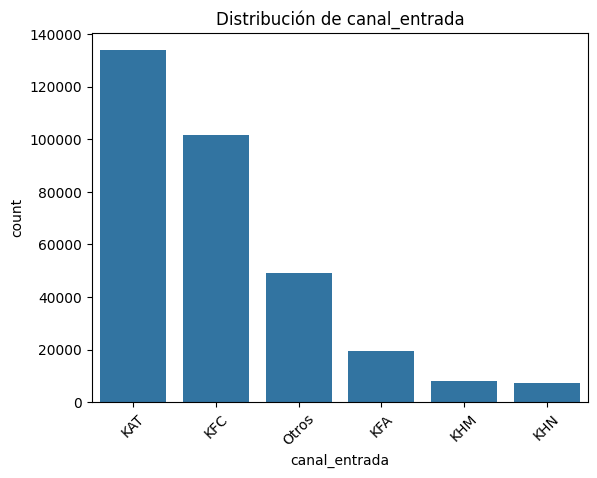

segmento
02 - PARTICULARES     0.680260
01 - TOP              0.260989
03 - UNIVERSITARIO    0.058563
DESCONOCIDO           0.000188
Name: proportion, dtype: float64


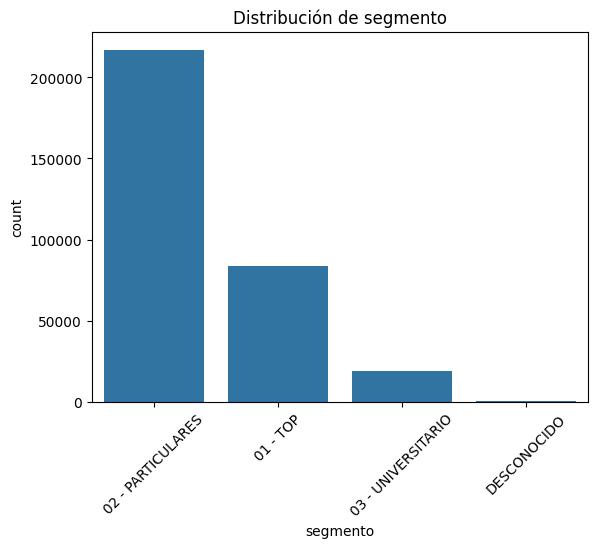

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in var_categoricas_2:
    print(df[col].value_counts(normalize=True))  
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


La mayoría de clientes son mujeres (V) con un 61.5% del total, los  hombres (H) representan el 38.4%.

El canal más común por el cual los clientes ingresaron es KAT (41.9%) Canal digital o app web, seguido por KFC (31.7%) Sucursal fisica. Se creó una categoría "Otros" para agrupar canales poco frecuentes y reducir la complejidad, por lo que son dos canales principales concentran la mayoría de los ingresos de clientes. Los canales de entrada KHN Referidos y KHM campañas de marketing telefonico o email suman el menos del 5% de los registros. El canal de KFA asesores en campo u oficina representan menos del 10% de los registros.

El segmento 02 - PARTICULARES es el más grande, con un 68% de los clientes. Le sigue 01 - TOP (26%) (clientes con alto perfil económico), y luego un grupo pequeño de universitarios (5.8%). Muy pocos clientes están en el segmento desconocido.

La mayor parte de registros estan comprendidos por clientes estandar o particulares

Se verifica y hace una agrupación para confirmar el canal por el cual hay mas clientes registrados.

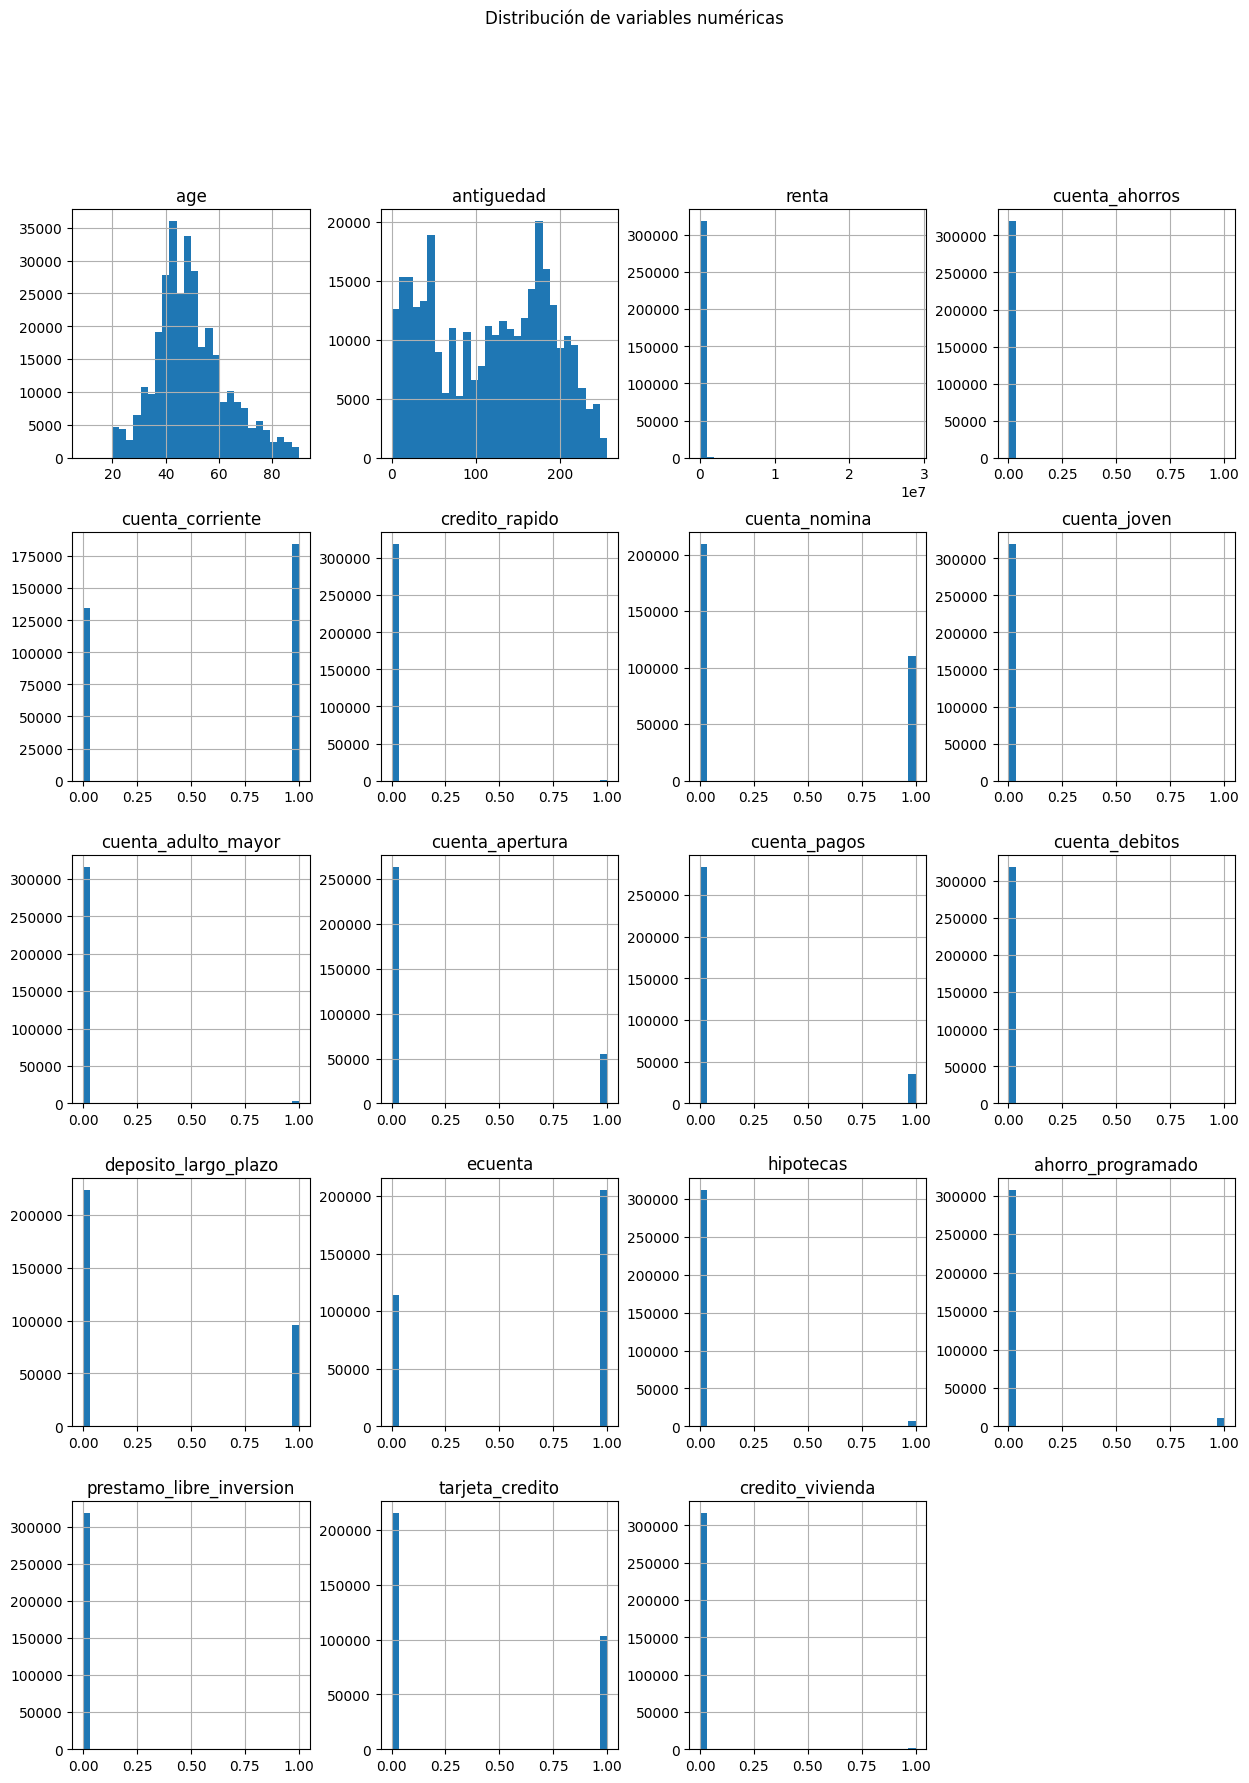

In [11]:
df[var_numericas_2].describe().T
df[var_numericas_2].hist(bins=30, figsize=(15, 20))
plt.suptitle("Distribución de variables numéricas")
plt.show()

- Las edades más frecuentes están entre 40 y 50 años, una edad laboral activa.
- Para la antiguedad uno de los picos más frecuentes se encuetnra al rededor de los 170 meses ( 14 años), son clientes con bastante tiempo en la entidead, gran valor de fidelización.
- La mayoría de clientes 15.84% tiene nun valor de renta ( ingresos) de 108.126, el resto de valores están bastantes dispersos y no se encuentran grupos similares.
- Al rededor del 0 % de los clientes tienen un solo producto, el 20% tienen 2 productos y menos del 5% tienen los 3 productos target activos. 

### Los productos más frecuentes que tienen los clientes son :
- Cuenta corrientes: Más del 50% de personas tienen este producto, es un producto muy común que todas las personas registradas en una entidad financiera suelen tener. 
- Ecuenta más del 60% de personas tienen este producto, puede ser por su naturaleza digital, no requiere documentación fisica para su apertura.
- Cuenta de nómina : Al rededor del 30% de clientes tienen su cuenta de nómina, en la que le pagan sus empresas por sus labores.
- Tarjeta de crédito: Al rededro del 30 % de los clientes tienen una tarjeta de crédito.
- Deposito a largo plazo: Al redeor del 30% de clientes tiene un prodcuto de ahorro a largo plazo como un cdat.


### Los productos menos frecuentes son:
- Productos de captación como cuenta ahorros, cuenta joven, cuenta debito y producto de colocación como crédito rápido, los clientes que tienen estos productos representan menos del 1%.
- Los clientes con hipotecas, creditos de vivienda y prestamos de libre inversión representan menos del 5% de registros, un bajo uso de estos registros puede ser por politicas o perfil del cliente.


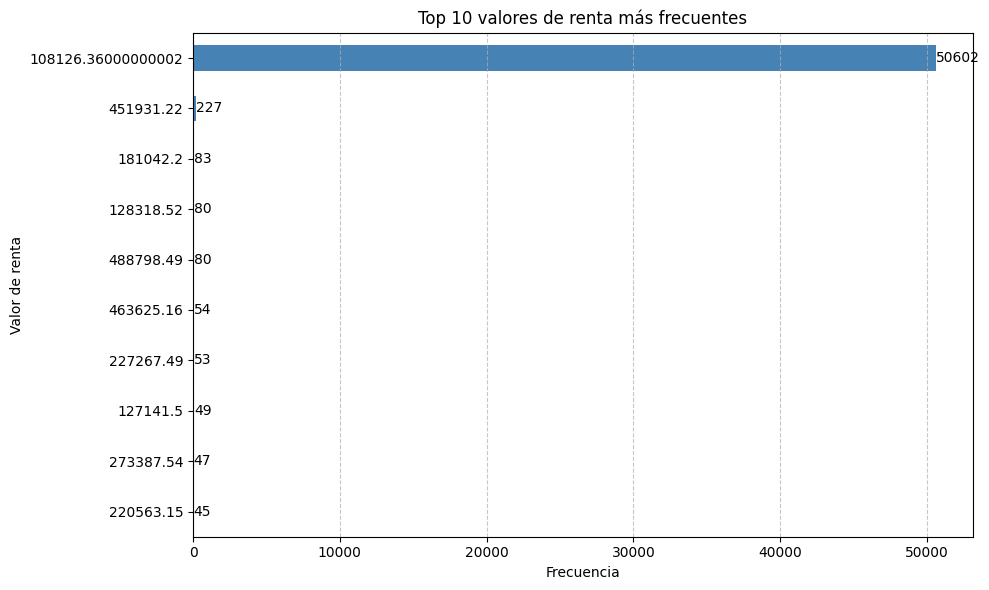

In [23]:
conteo_renta= df['renta'].value_counts()
top_10_renta = conteo_renta.head(10)

import matplotlib.pyplot as plt

# Paso 1: Obtener los 10 valores de renta más frecuentes
conteo_renta = df['renta'].value_counts()
top_10_renta = conteo_renta.head(10).sort_values(ascending=True)  # Ordenamos para que el más alto esté arriba

# Paso 2: Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
top_10_renta.plot(kind='barh', color='steelblue')

# Paso 3: Personalizar gráfico
plt.title('Top 10 valores de renta más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Valor de renta')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas con el valor de la renta (opcional)
for index, value in enumerate(top_10_renta):
    plt.text(value + 5, index, str(value), va='center')

plt.tight_layout()
plt.show()

### Promedio de renta por segmento

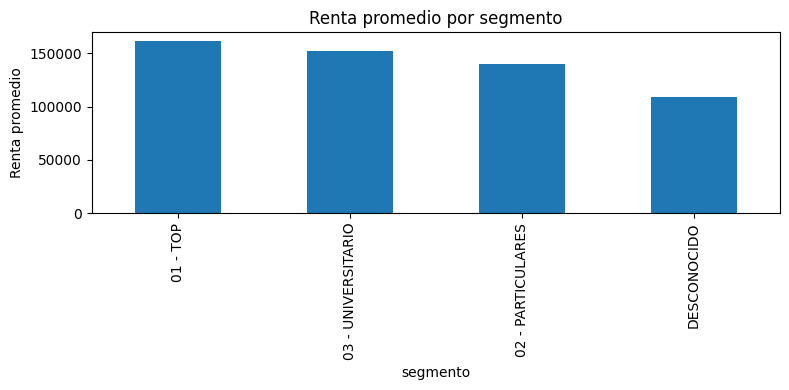

In [14]:
df.groupby('segmento')['renta'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(8, 4))
plt.title("Renta promedio por segmento")
plt.ylabel("Renta promedio")
plt.tight_layout()
plt.show()


## Proporción de uso de productos clave

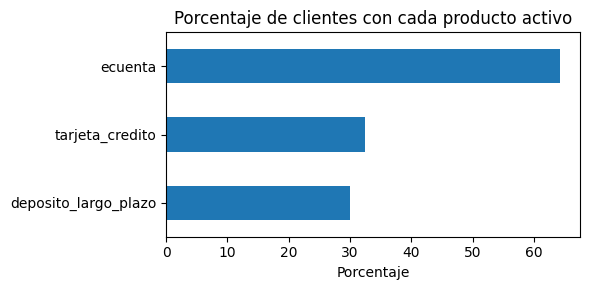

In [12]:
productos = ['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']

uso_productos = {prod: df[prod].mean()*100 for prod in productos}
pd.Series(uso_productos).sort_values().plot(kind='barh', figsize=(6, 3))
plt.title("Porcentaje de clientes con cada producto activo")
plt.xlabel("Porcentaje")
plt.tight_layout()
plt.show()

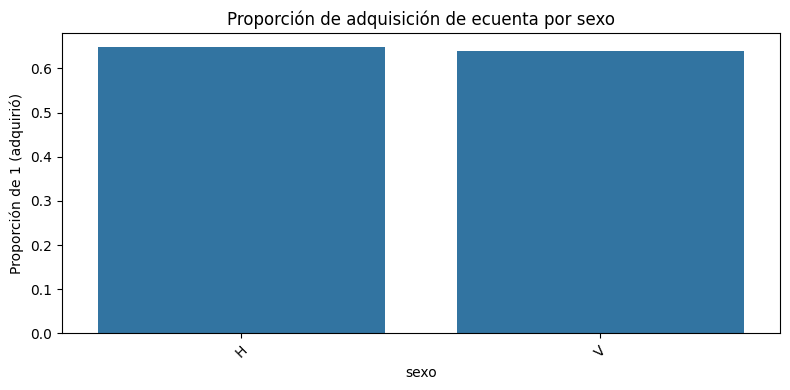

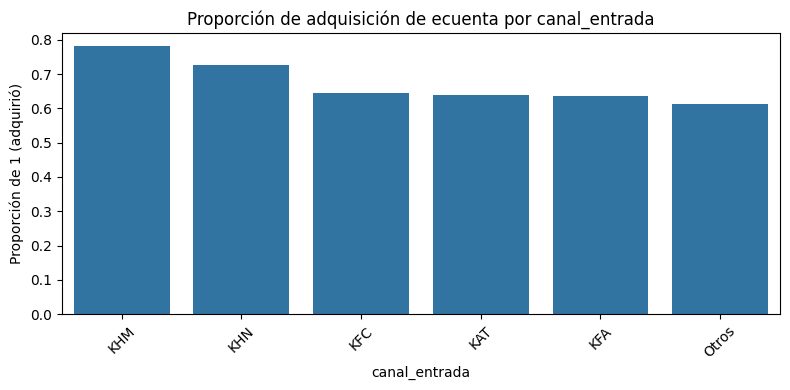

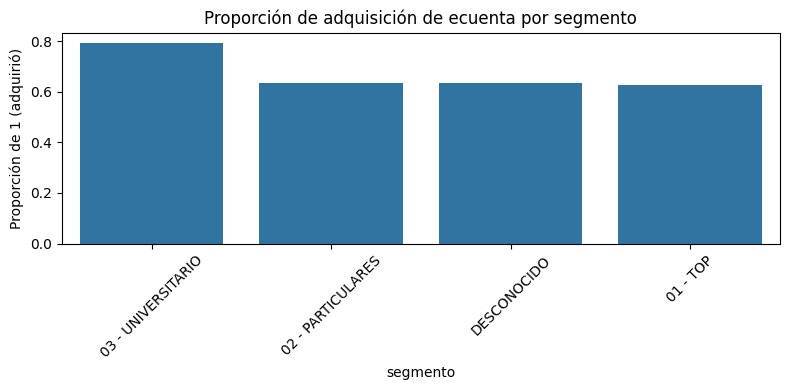

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['sexo', 'segmento', 'canal_entrada']  # Ajusta según tus variables
target = 'ecuenta'  # Ajusta según tu producto objetivo

for col in var_categoricas_2:
    plt.figure(figsize=(8, 4))
    prop = df.groupby(col)[target].mean().sort_values(ascending=False)
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f'Proporción de adquisición de {target} por {col}')
    plt.ylabel('Proporción de 1 (adquirió)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

               tarjeta_credito   ecuenta  deposito_largo_plazo
canal_entrada                                                 
KAT                   0.380803  0.640141              0.296706
KFC                   0.311158  0.645674              0.281369
Otros                 0.308027  0.613148              0.324710
KFA                   0.249732  0.637411              0.387373
KHN                   0.076410  0.726313              0.302862
KHM                   0.069412  0.781067              0.237592


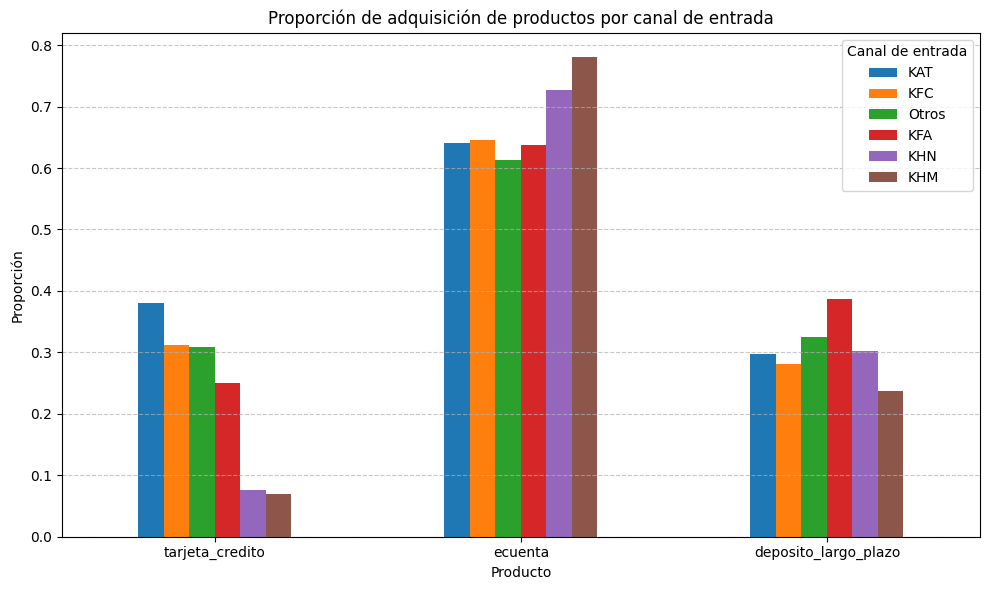

In [10]:
# Agrupar por canal_entrada y calcular la media de cada producto objetivo
agrupado_canal = df.groupby('canal_entrada')[['tarjeta_credito', 'ecuenta', 'deposito_largo_plazo']].mean()

# Ordenar por canal_entrada para mantener consistencia (opcional)
agrupado_canal = agrupado_canal.sort_values(by='tarjeta_credito', ascending=False)

# Mostrar
print(agrupado_canal)

agrupado_canal.T.plot(kind='bar', figsize=(10, 6))
plt.title('Proporción de adquisición de productos por canal de entrada')
plt.ylabel('Proporción')
plt.xlabel('Producto')
plt.xticks(rotation=0)
plt.legend(title='Canal de entrada')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Los clientes que se afiliaron por el canal KAT (Canal digital o app web) tienen mayor proporción el prodcuto tarjeta de credito, es posible que mediante este canal se presenten opciones para que el cliente sea más propenso a adquirir este producto.

Los clientes registrados por los canales KHM (Campañas telfonicas o email) y KHN (Campaña de referidos) presentan alta proporción en el producto ecuenta.

Los clientes que se afiliaron por el canal KFA (Asesores en campo u oficina) tienen mayor proporción del producto deposito a largo plazo, lo que podría indicar una baja digitalización del producto.

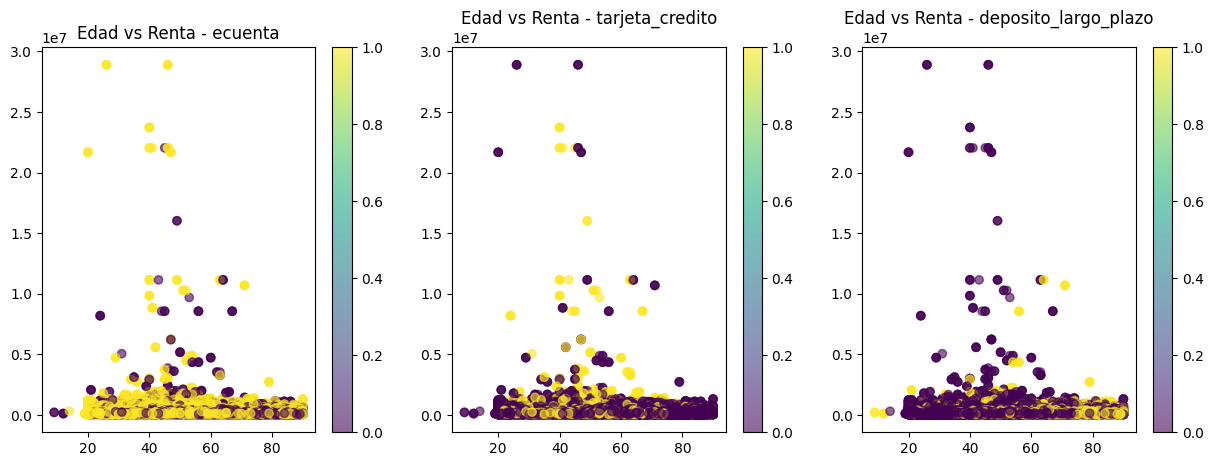

In [16]:
# Scatter plot con colores por tenencia de productos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
productos = ['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']
for i, producto in enumerate(productos):
    scatter = axes[i].scatter(df['age'], df['renta'], c=df[producto], alpha=0.6, cmap='viridis')
    axes[i].set_title(f'Edad vs Renta - {producto}')
    plt.colorbar(scatter, ax=axes[i])

## Matriz de correlación

In [15]:
# Filtrar columnas numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num = df_num.drop(columns=['ncodpers'], errors='ignore')

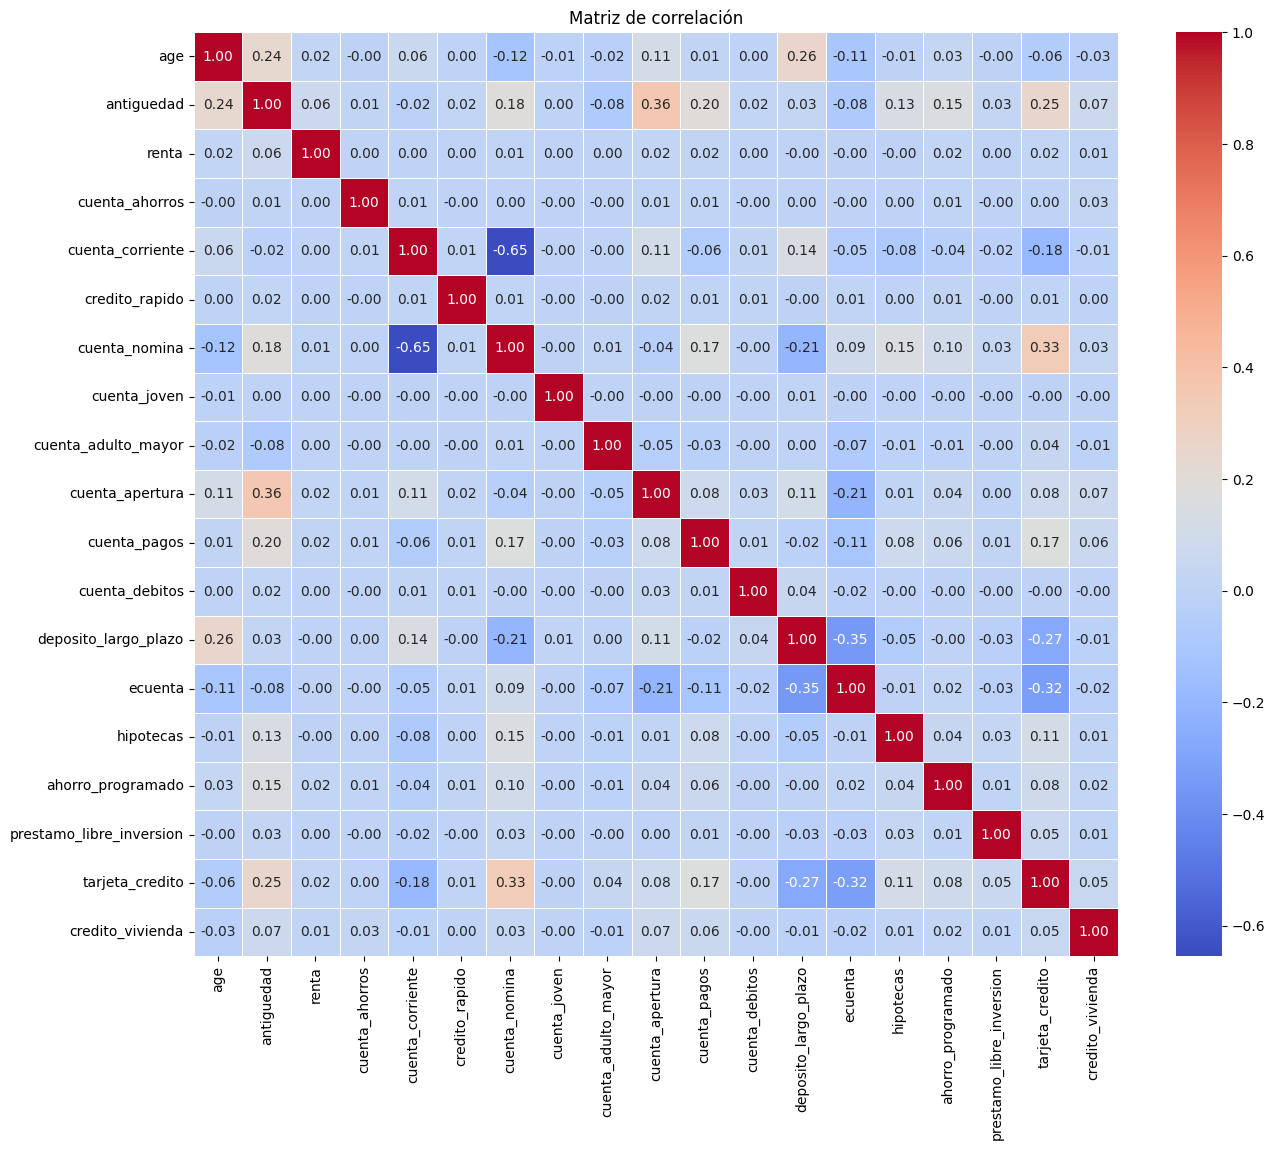

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz
corr = df_num.corr()

# Visualizar
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Matriz de correlación")
plt.show()

## Para ver las variables mas correlacionadas con una variable objetivo

In [17]:
corr_target = corr['tarjeta_credito'].sort_values(ascending=False)
print(corr_target)

tarjeta_credito             1.000000
cuenta_nomina               0.331898
antiguedad                  0.245189
cuenta_pagos                0.171670
hipotecas                   0.110008
ahorro_programado           0.082569
cuenta_apertura             0.081147
prestamo_libre_inversion    0.050137
credito_vivienda            0.047408
cuenta_adulto_mayor         0.040853
renta                       0.022273
credito_rapido              0.006810
cuenta_ahorros              0.000219
cuenta_debitos             -0.002606
cuenta_joven               -0.004069
age                        -0.057983
cuenta_corriente           -0.184510
deposito_largo_plazo       -0.267223
ecuenta                    -0.321298
Name: tarjeta_credito, dtype: float64


In [12]:
corr_target2 = corr['ecuenta'].sort_values(ascending=False)
print(corr_target2)

ecuenta                     1.000000
total_productos             0.341360
cuenta_nomina               0.086708
ahorro_programado           0.021083
credito_rapido              0.005107
cuenta_ahorros             -0.001067
renta                      -0.001893
cuenta_joven               -0.004536
hipotecas                  -0.007652
cuenta_debitos             -0.024065
credito_vivienda           -0.024500
prestamo_libre_inversion   -0.025230
antiguedad_por_edad        -0.042500
cuenta_corriente           -0.048050
cuenta_adulto_mayor        -0.074241
antiguedad                 -0.083192
age                        -0.106972
cuenta_pagos               -0.114768
cuenta_apertura            -0.212100
tarjeta_credito            -0.321298
deposito_largo_plazo       -0.346021
Name: ecuenta, dtype: float64


In [13]:
corr_target3 = corr['deposito_largo_plazo'].sort_values(ascending=False)
print(corr_target3)

deposito_largo_plazo        1.000000
total_productos             0.336311
age                         0.255857
cuenta_corriente            0.143918
cuenta_apertura             0.107280
cuenta_debitos              0.039967
antiguedad                  0.029949
cuenta_joven                0.005465
cuenta_adulto_mayor         0.003150
cuenta_ahorros              0.002580
ahorro_programado          -0.001357
renta                      -0.001565
credito_rapido             -0.003034
credito_vivienda           -0.014959
cuenta_pagos               -0.018405
prestamo_libre_inversion   -0.026406
hipotecas                  -0.054616
antiguedad_por_edad        -0.058815
cuenta_nomina              -0.208232
tarjeta_credito            -0.267223
ecuenta                    -0.346021
Name: deposito_largo_plazo, dtype: float64
